# Import libraties

In [23]:
#!pip install weibull
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import weibull
import warnings
warnings.filterwarnings('ignore')

# Get Data and create suspended column

In [54]:
data = pd.read_csv('data/Trucks.csv')
data['suspended'] = data['Type'].map({'F':False, 'C':True})
print(data['Type'].value_counts())
data.head()

F    18
C    10
Name: Type, dtype: int64


,MTF,Type,suspended
0,62874,F,False
1,32903,F,False
2,17489,C,True
3,33094,F,False
4,31017,F,False


# Analysis

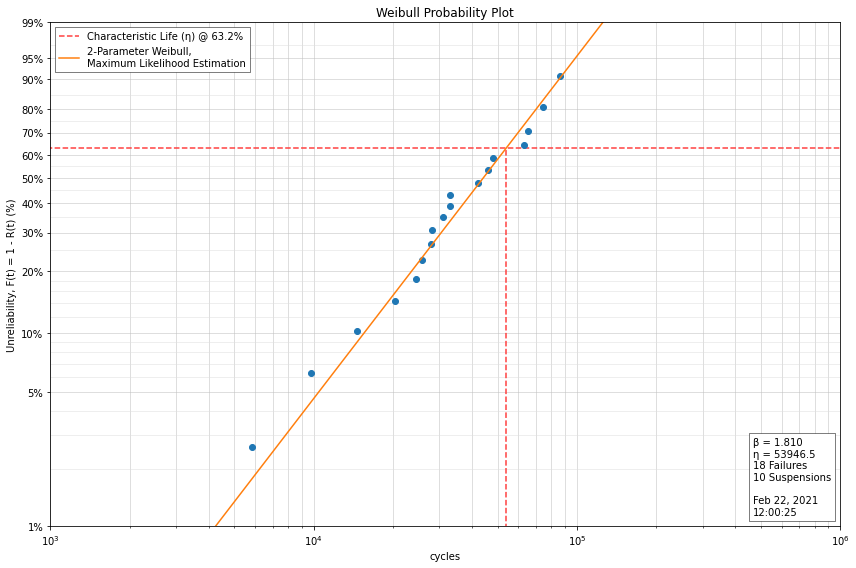


beta:  1.81
eta:  53946.51

B10 life: 15560

 fit method          maximum likelihood estimation
confidence                                   0.95
beta lower limit                           1.2529
beta nominal                              1.80997
beta upper limit                          2.61473
eta lower limit                           41794.2
eta nominal                               53946.5
eta upper limit                           69632.3
dtype: object


In [64]:
analysis = weibull.Analysis(list(data['MTF'].values),
                            suspended=list(data['suspended'].values),
                            unit='cycle')

#Training the model
analysis.fit(method= 'mle', confidence_level=0.95)

#Plotting Probability plot
analysis.probplot()

#Printing results
print(f'\nbeta: {analysis.beta: .02f}')
print(f'eta: {analysis.eta: .02f}')

print(f'\nB10 life: {analysis.b(10):.0f}')

print('\n',analysis._fit_test)

# Plotting

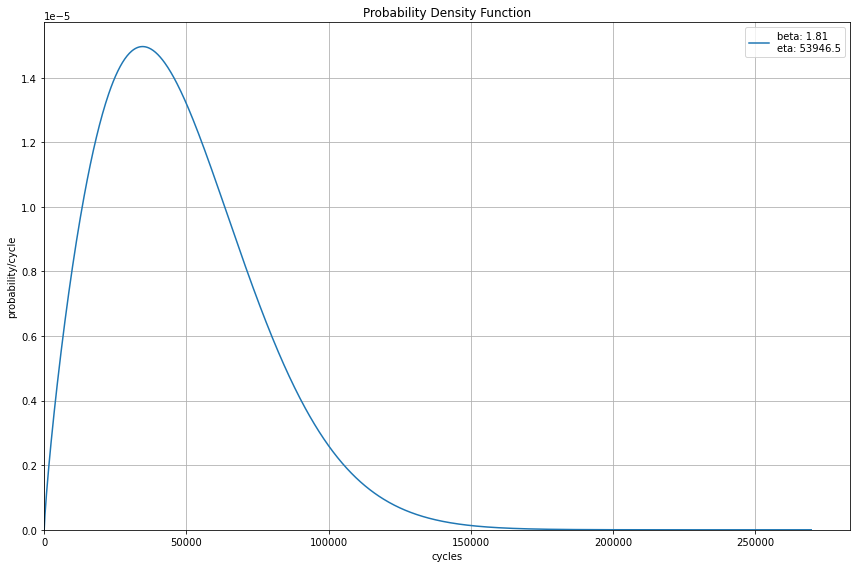

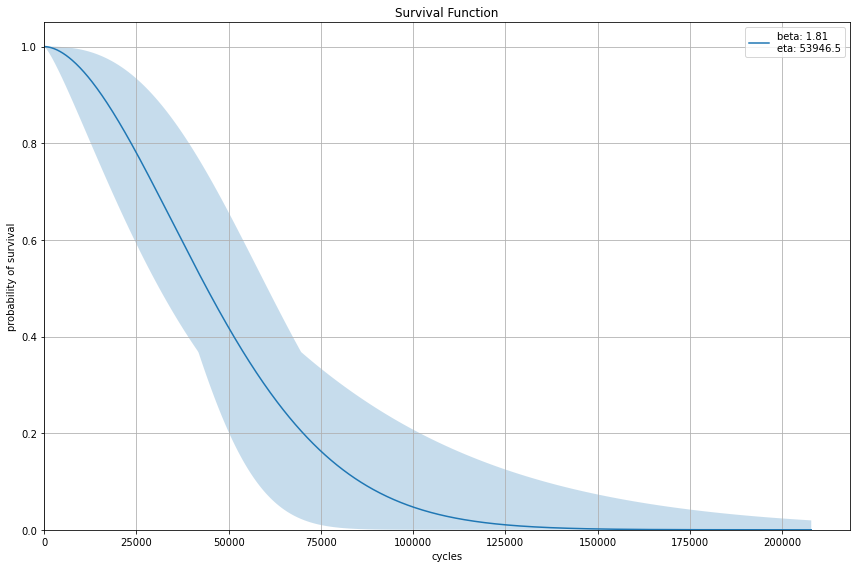

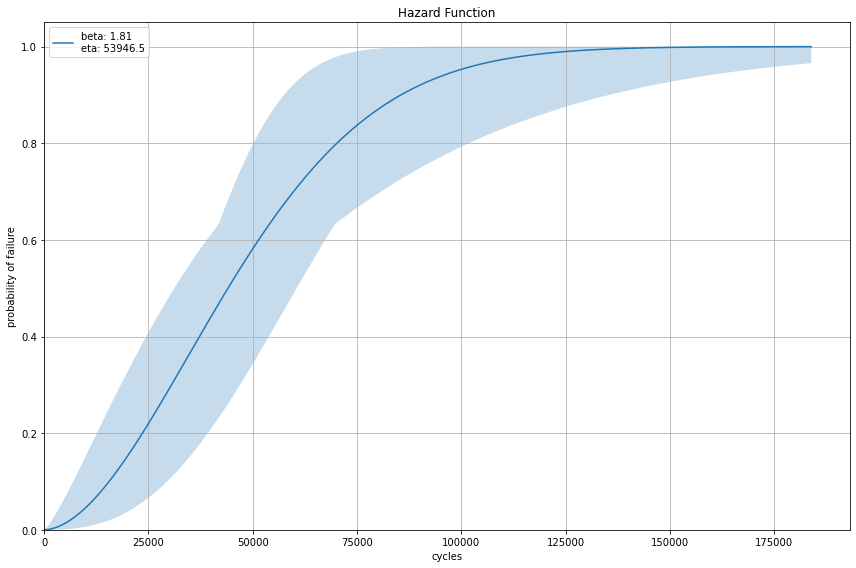

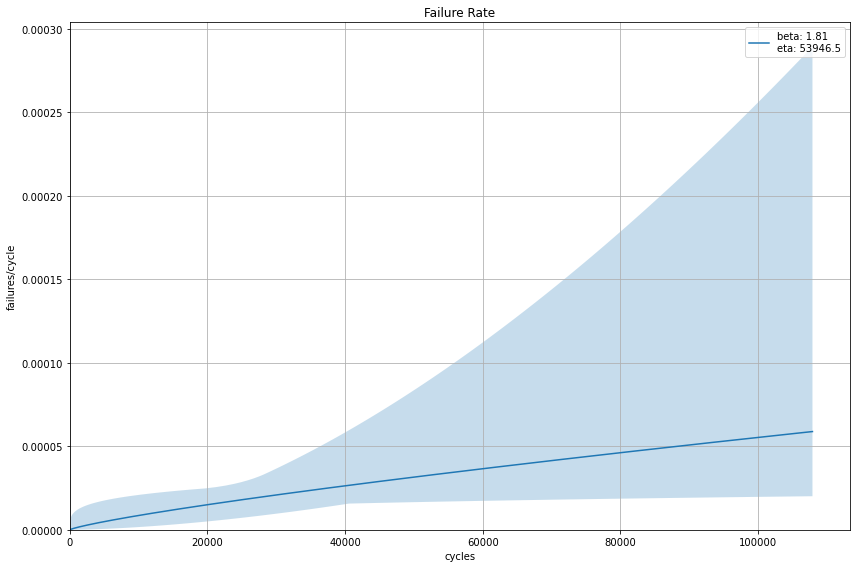

In [65]:
analysis.pdf()      # probability density function
analysis.sf()       # survival function
analysis.hazard()   # hazard function
#analysis.cdf()      # cumulative distribution function
analysis.fr()       # failure rate